# Лабораторна робота номер 3

## Підготовка навчальної вибірки

Спочатку я імпортую бібліотеки і завантажую данні з мітками класів

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import *
import pandas as pd
import numpy as np

In [2]:
marksTypes = {}
with open("abalone.names", 'r') as file:
    for line in file:
        line = line.replace('\n', '').replace('.', '').split(' - ')
        marksTypes[line[0]] = line[1]

In [3]:
marksTypes

{'Sex': 'nominal',
 'Length': 'continuous',
 'Diameter': 'continuous',
 'Height': 'continuous',
 'Whole weight': 'continuous',
 'Shucked weight': 'continuous',
 'Viscera weight': 'continuous',
 'Shell weight': 'continuous',
 'Rings': 'continuous'}

In [4]:
mainData = []
with open("abalone.data", 'r') as file:
    for line in file:
        mainData.append(line.replace('\n', '').split(','))

DataFrame = pd.DataFrame(columns=marksTypes.keys(), data = mainData)

DataFrame

Sex Length Diameter Height Whole weight Shucked weight Viscera weight   
0      M  0.455    0.365  0.095        0.514         0.2245          0.101  \
1      M   0.35    0.265   0.09       0.2255         0.0995         0.0485   
2      F   0.53     0.42  0.135        0.677         0.2565         0.1415   
3      M   0.44    0.365  0.125        0.516         0.2155          0.114   
4      I   0.33    0.255   0.08        0.205         0.0895         0.0395   
...   ..    ...      ...    ...          ...            ...            ...   
4172   F  0.565     0.45  0.165        0.887           0.37          0.239   
4173   M   0.59     0.44  0.135        0.966          0.439         0.2145   
4174   M    0.6    0.475  0.205        1.176         0.5255         0.2875   
4175   F  0.625    0.485   0.15       1.0945          0.531          0.261   
4176   M   0.71    0.555  0.195       1.9485         0.9455         0.3765   

     Shell weight Rings  
0            0.15    15  
1            0.07     7  
2            0.21     9  
3           0.155    10  
4           0.055     7  
...           ...   ...  
4172        0.249    11  
4173       0.2605    10  
4174        0.308     9  
4175        0.296    10  
4176        0.495    12  

[4177 rows x 9 columns]

Потім перевіряю датасет на наявність пропусків. На моє щастя їх тут немає.

In [5]:
DataFrame.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Тепер я візуалізую данні. З графіків видно що сильних викидів немає, данні навіть слідують якійсь помітній на графіку закономірності що є трішки дивним.

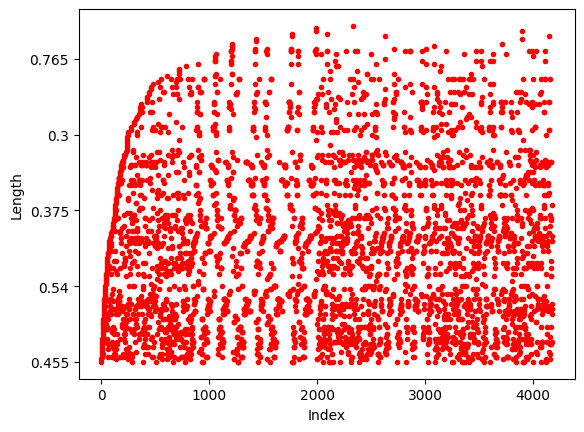

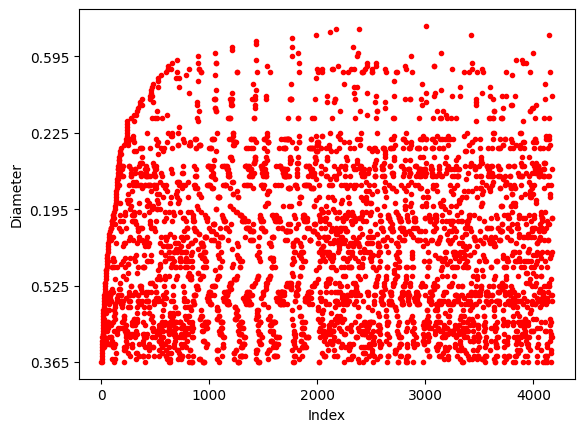

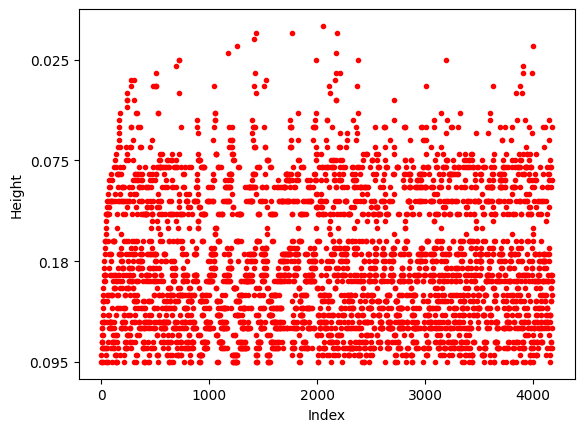

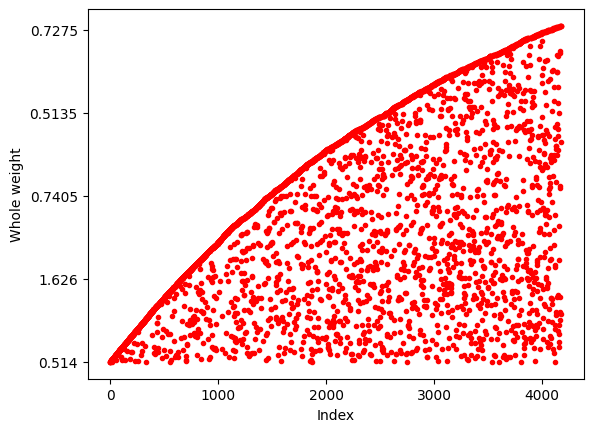

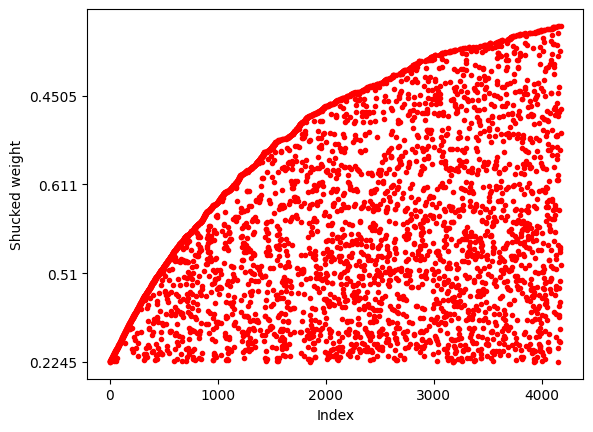

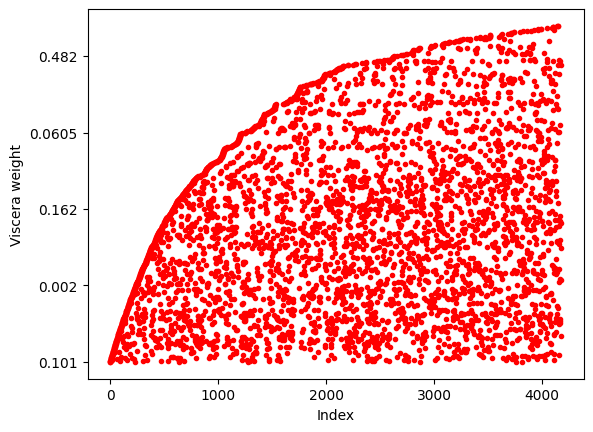

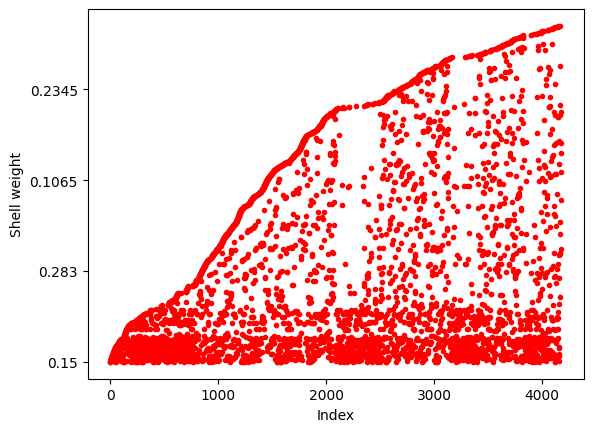

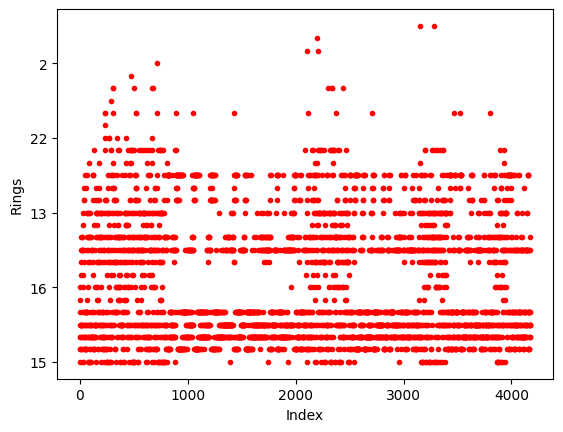

In [6]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def dGraph(key):
    plt.scatter(DataFrame.index, DataFrame[key], color='red', marker='.')
    plt.xlabel('Index')
    plt.ylabel(key)
    y_ticks = ticker.MaxNLocator(5)  # Adjust the number of ticks as needed
    plt.gca().yaxis.set_major_locator(y_ticks)

    plt.show()


for key in marksTypes.keys():
    if marksTypes[key] == 'continuous':
        dGraph(key)

In [7]:
selected = []
for key in marksTypes.keys():
    if marksTypes[key] == 'continuous':
        DataFrame[key] = DataFrame[key].astype(float)
        selected.append(key)
selected

['Length',
 'Diameter',
 'Height',
 'Whole weight',
 'Shucked weight',
 'Viscera weight',
 'Shell weight',
 'Rings']

Бінаризую категореальні данні (Аж один стовпець) і відділяю числові в окремий датафрейм.

In [8]:
resDF = pd.get_dummies(DataFrame, dtype=int)
selected = resDF[selected]
resDF

Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight   
0      0.455     0.365   0.095        0.5140          0.2245          0.1010  \
1      0.350     0.265   0.090        0.2255          0.0995          0.0485   
2      0.530     0.420   0.135        0.6770          0.2565          0.1415   
3      0.440     0.365   0.125        0.5160          0.2155          0.1140   
4      0.330     0.255   0.080        0.2050          0.0895          0.0395   
...      ...       ...     ...           ...             ...             ...   
4172   0.565     0.450   0.165        0.8870          0.3700          0.2390   
4173   0.590     0.440   0.135        0.9660          0.4390          0.2145   
4174   0.600     0.475   0.205        1.1760          0.5255          0.2875   
4175   0.625     0.485   0.150        1.0945          0.5310          0.2610   
4176   0.710     0.555   0.195        1.9485          0.9455          0.3765   

      Shell weight  Rings  Sex_F  Sex_I  Sex_M  
0           0.1500   15.0      0      0      1  
1           0.0700    7.0      0      0      1  
2           0.2100    9.0      1      0      0  
3           0.1550   10.0      0      0      1  
4           0.0550    7.0      0      1      0  
...            ...    ...    ...    ...    ...  
4172        0.2490   11.0      1      0      0  
4173        0.2605   10.0      0      0      1  
4174        0.3080    9.0      0      0      1  
4175        0.2960   10.0      1      0      0  
4176        0.4950   12.0      0      0      1  

[4177 rows x 11 columns]

Видаляю один з стовпців утворений при перетворенні категореальних даних в ванхот вектори через його неінформативність при наявності двох інших.

In [19]:
resDF=resDF.drop(axis=1, columns=['Sex_F'])

Потім виводжу графіки попарної залежності числових ознак. В них вже явно видні два викиди по висоті, що треба видалити.

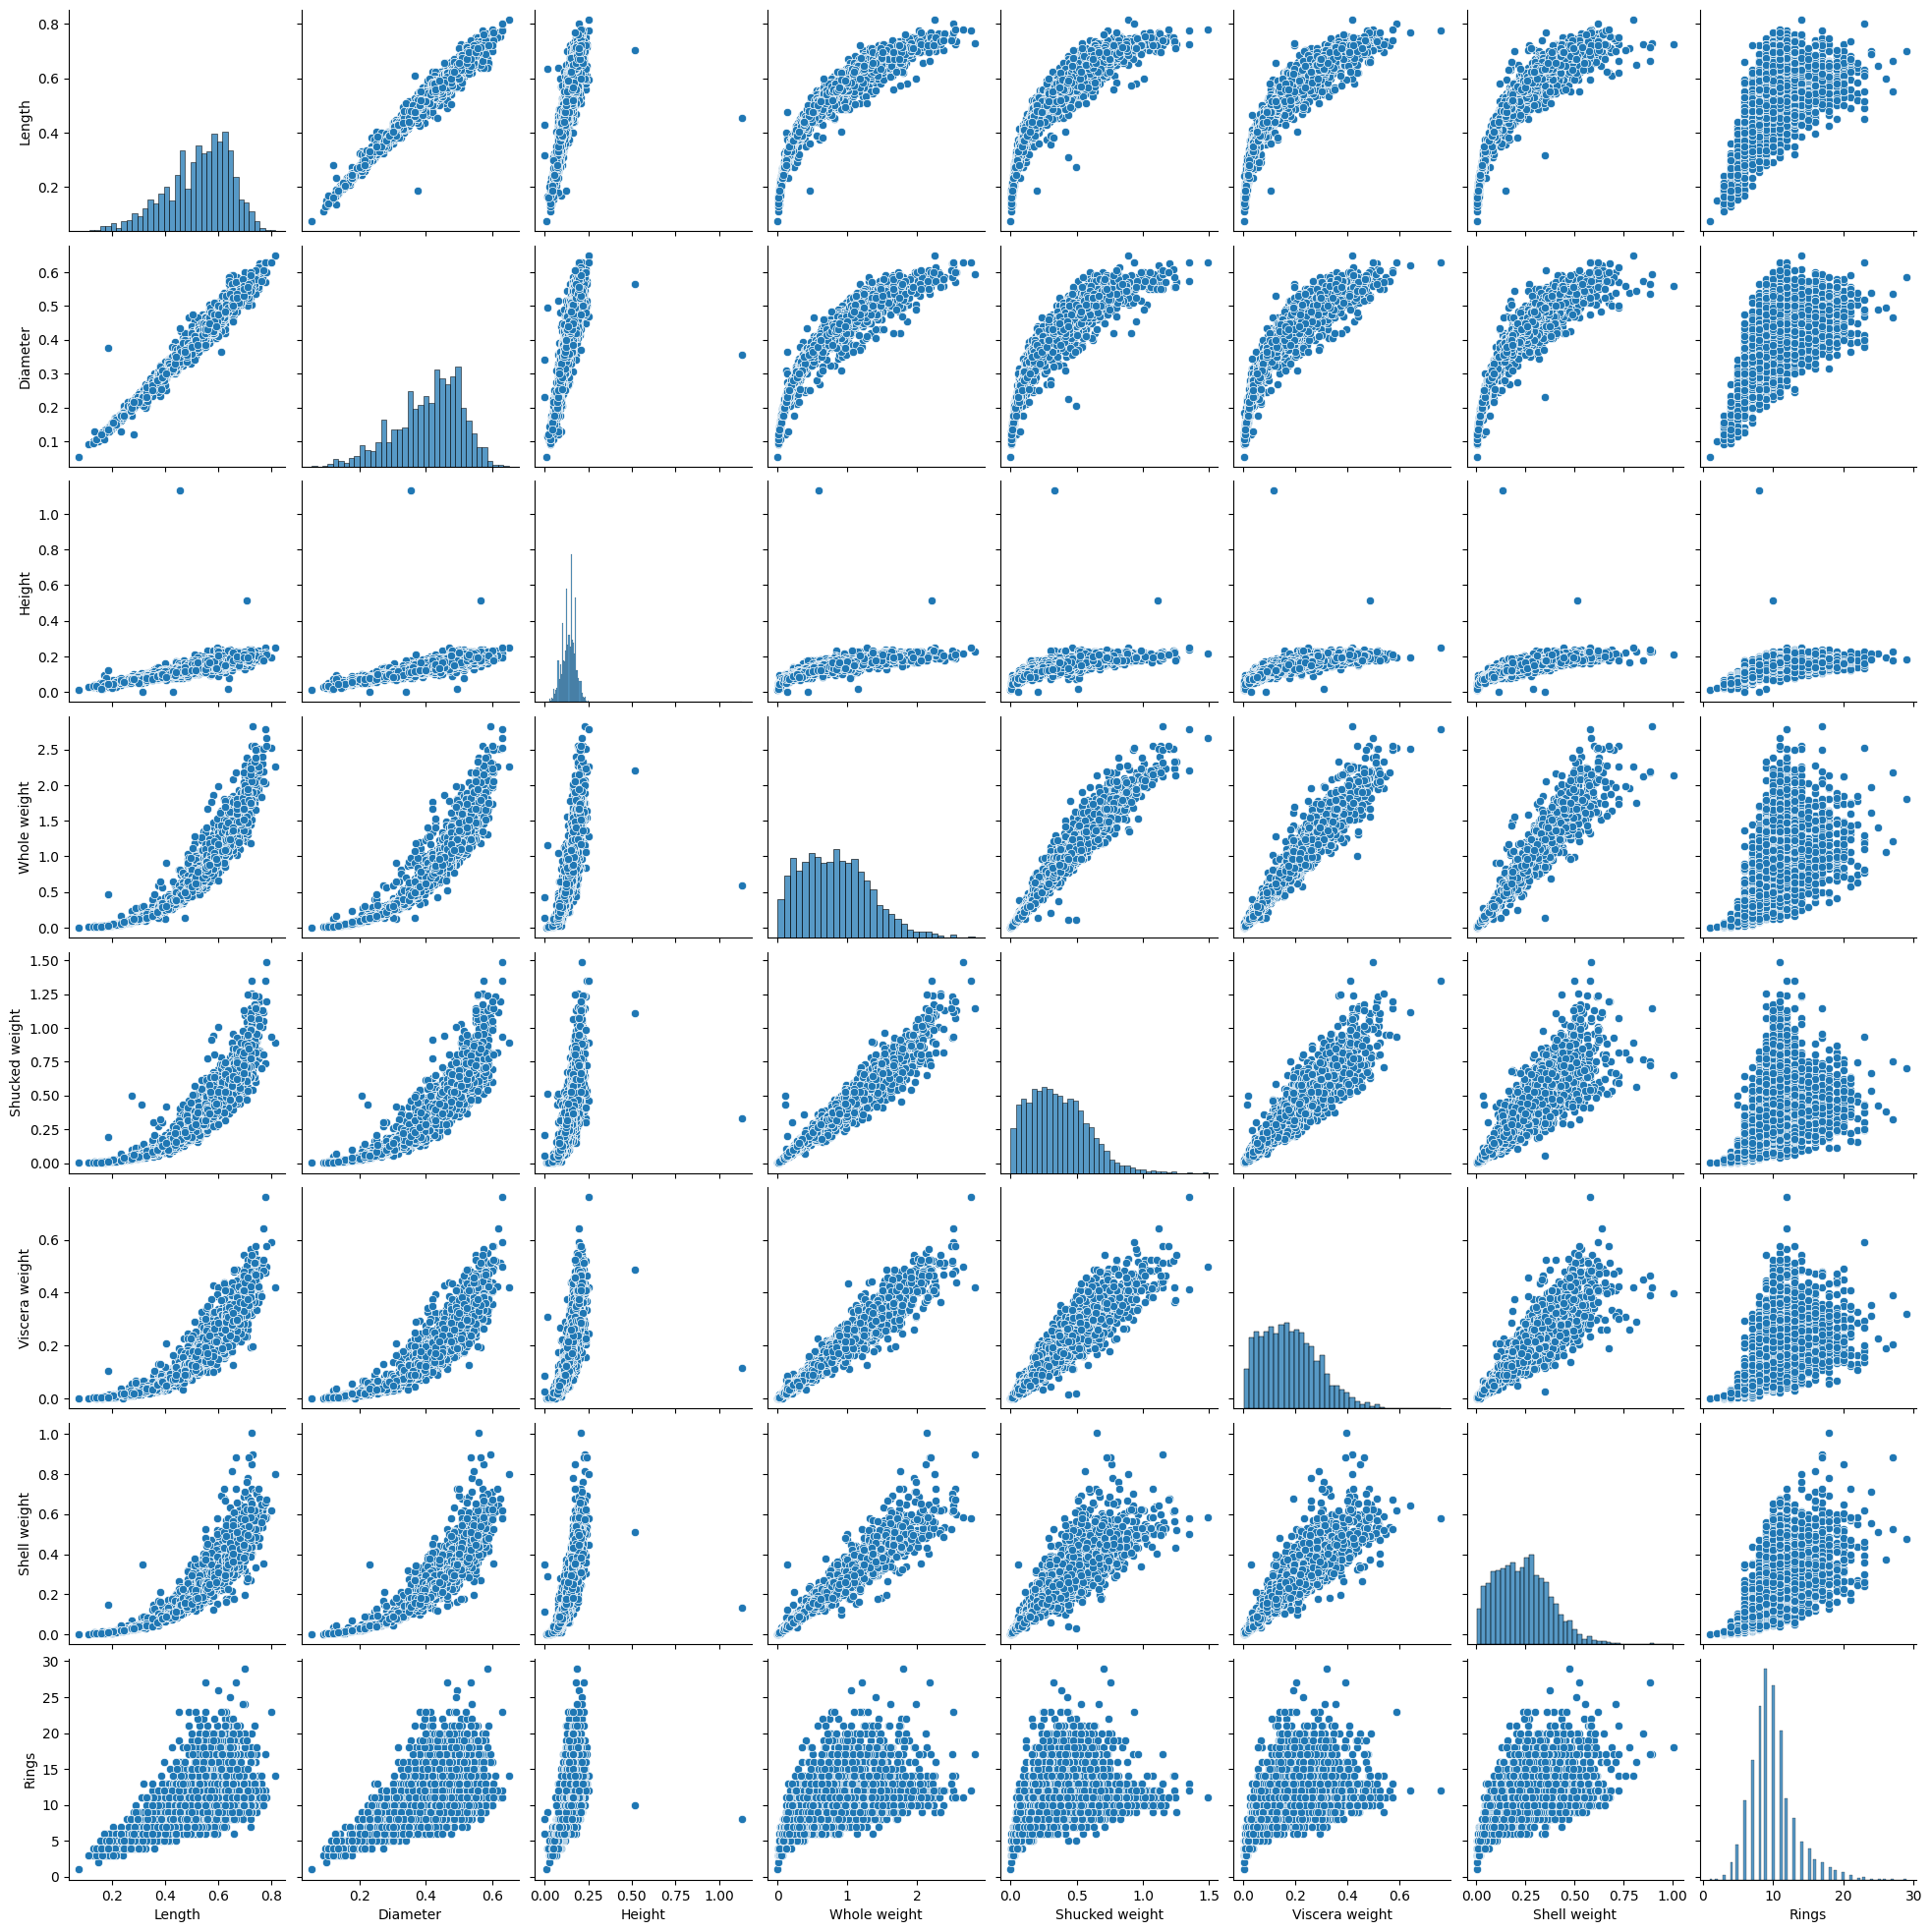

In [9]:
import seaborn as sns
sns.pairplot(selected)

Після їх видалення графіки стали виглядати значно краще. Тепер можна переходити до нормалізації числових даних та скріплення їх з категоріальними. 

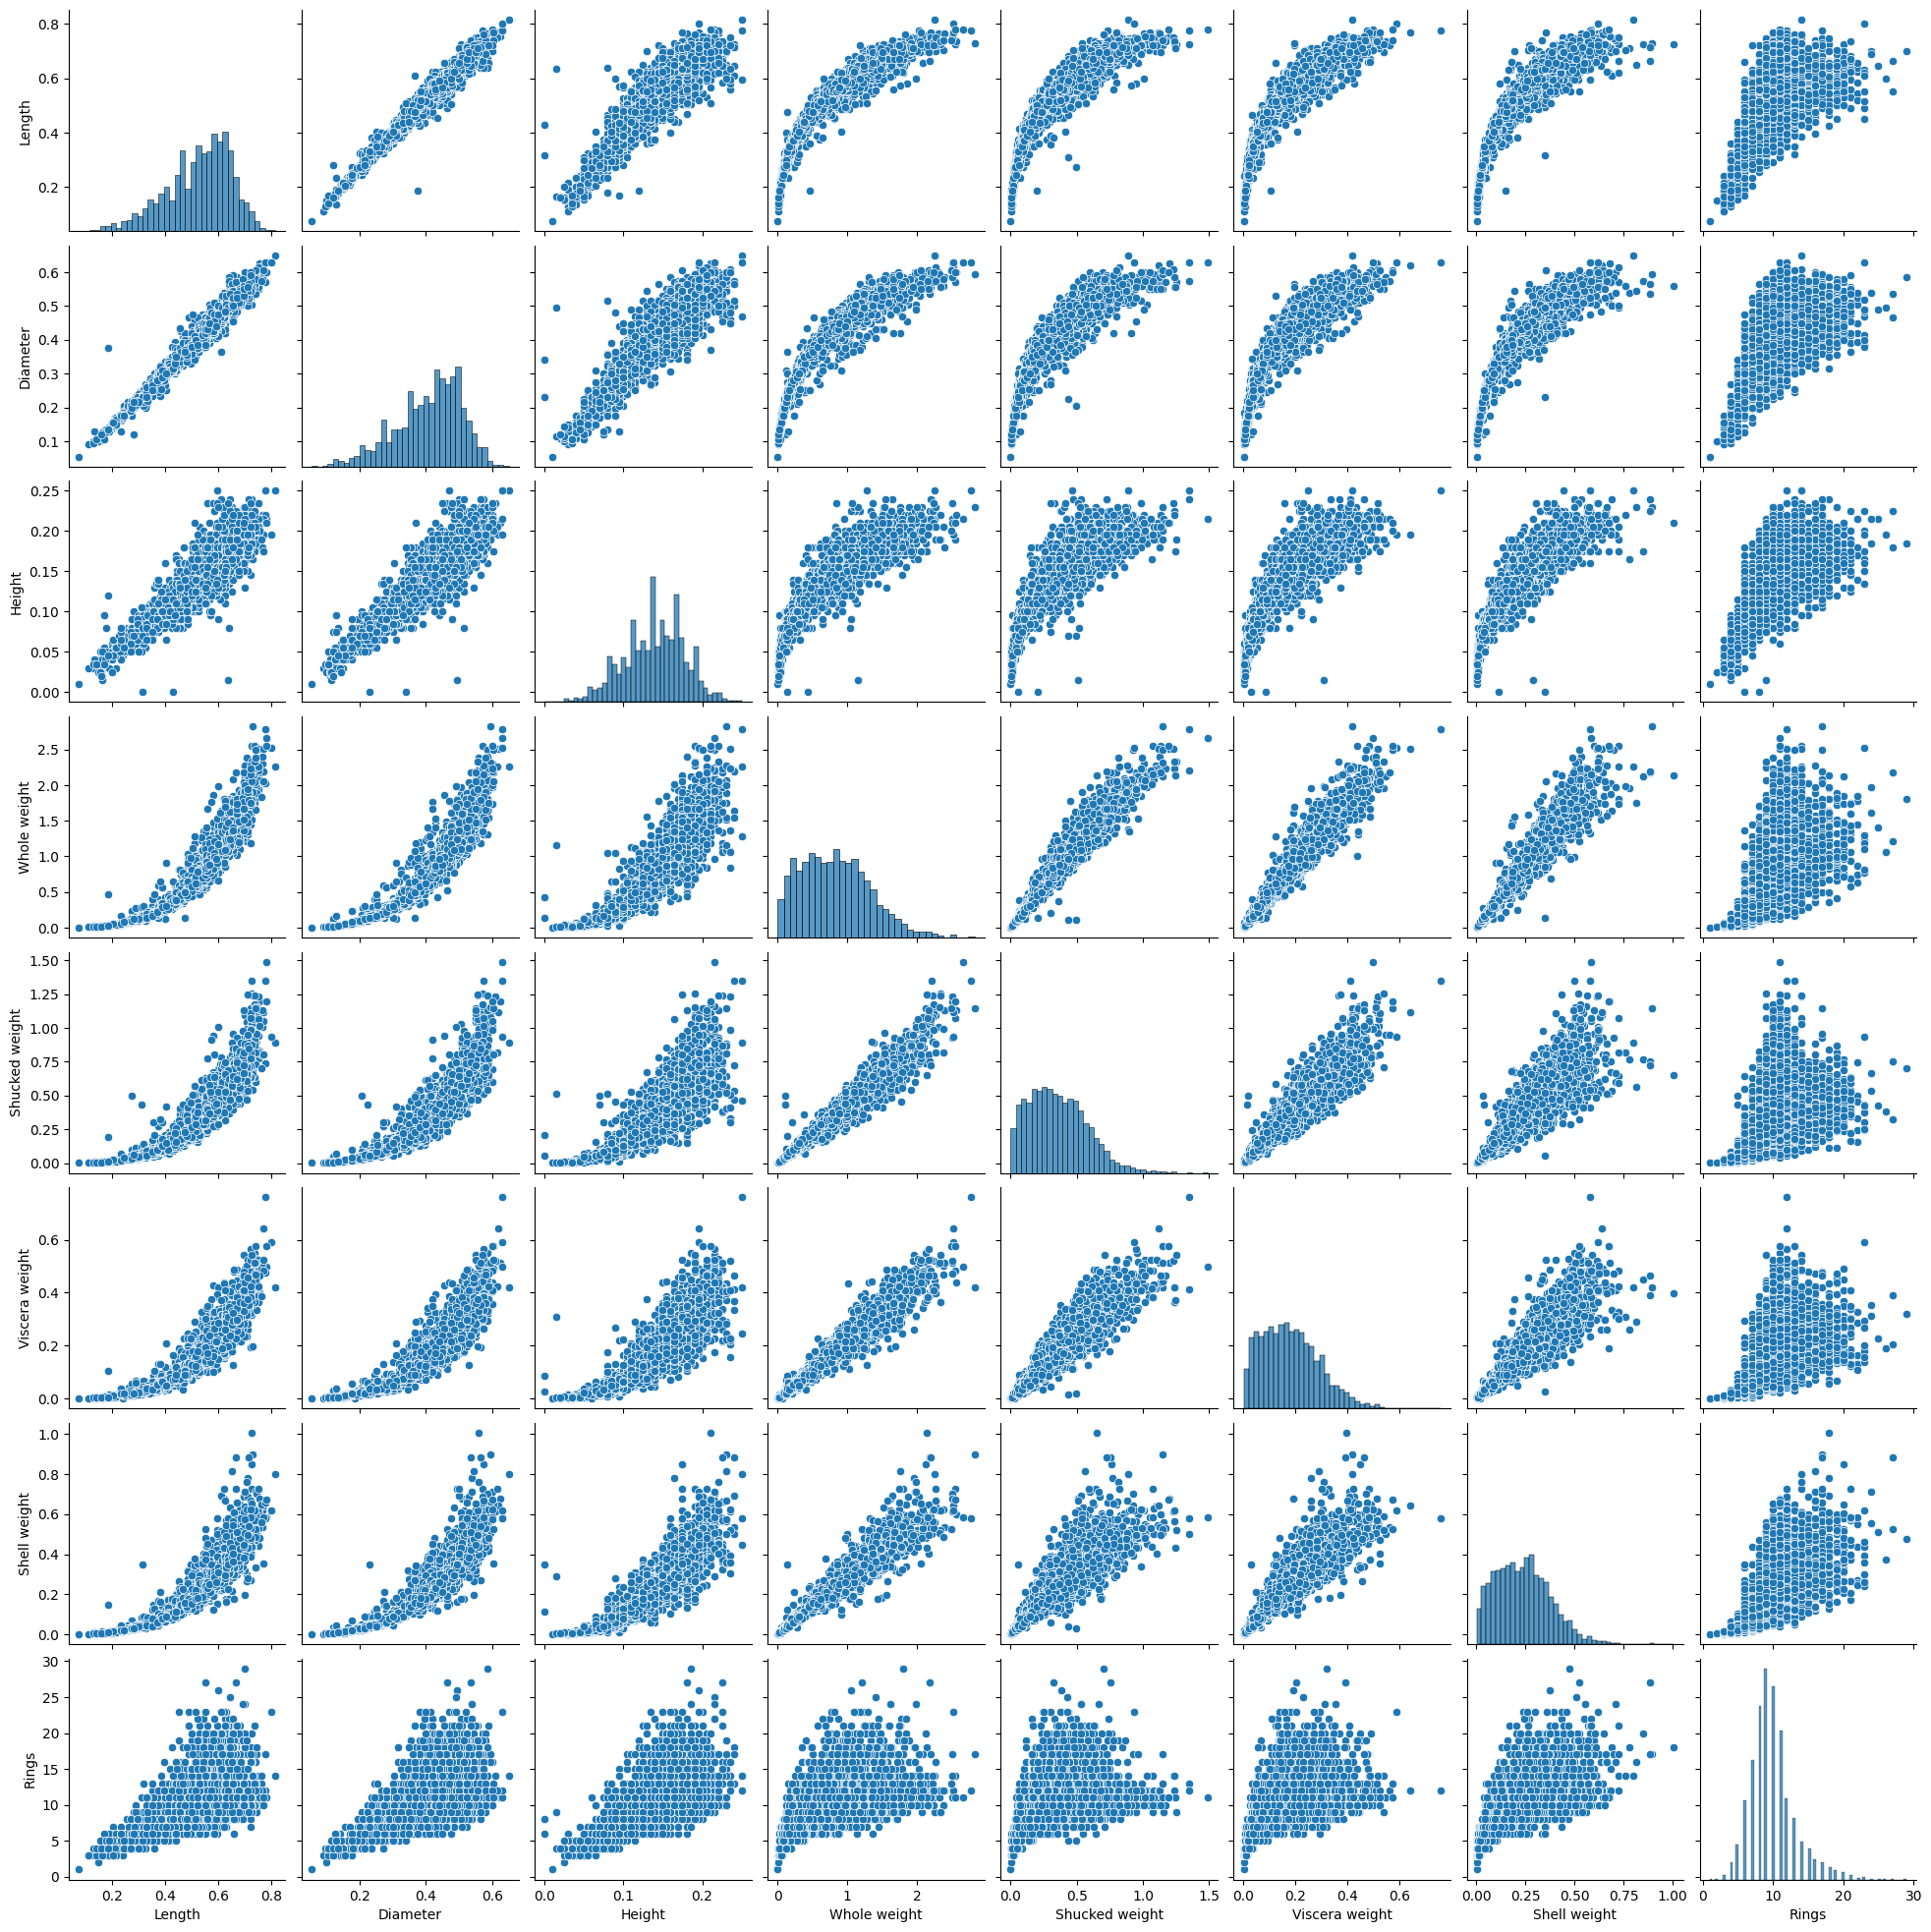

In [21]:
mask = selected['Height'] <= 0.4
sns.pairplot(selected[mask])

In [23]:
selected = selected[mask]
selected

Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight   
0      0.455     0.365   0.095        0.5140          0.2245          0.1010  \
1      0.350     0.265   0.090        0.2255          0.0995          0.0485   
2      0.530     0.420   0.135        0.6770          0.2565          0.1415   
3      0.440     0.365   0.125        0.5160          0.2155          0.1140   
4      0.330     0.255   0.080        0.2050          0.0895          0.0395   
...      ...       ...     ...           ...             ...             ...   
4172   0.565     0.450   0.165        0.8870          0.3700          0.2390   
4173   0.590     0.440   0.135        0.9660          0.4390          0.2145   
4174   0.600     0.475   0.205        1.1760          0.5255          0.2875   
4175   0.625     0.485   0.150        1.0945          0.5310          0.2610   
4176   0.710     0.555   0.195        1.9485          0.9455          0.3765   

      Shell weight  Rings  
0           0.1500   15.0  
1           0.0700    7.0  
2           0.2100    9.0  
3           0.1550   10.0  
4           0.0550    7.0  
...            ...    ...  
4172        0.2490   11.0  
4173        0.2605   10.0  
4174        0.3080    9.0  
4175        0.2960   10.0  
4176        0.4950   12.0  

[4175 rows x 8 columns]

In [35]:
mask = resDF['Height'] <= 0.4
pr = resDF[mask]
pr

Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight   
0      0.455     0.365   0.095        0.5140          0.2245          0.1010  \
1      0.350     0.265   0.090        0.2255          0.0995          0.0485   
2      0.530     0.420   0.135        0.6770          0.2565          0.1415   
3      0.440     0.365   0.125        0.5160          0.2155          0.1140   
4      0.330     0.255   0.080        0.2050          0.0895          0.0395   
...      ...       ...     ...           ...             ...             ...   
4172   0.565     0.450   0.165        0.8870          0.3700          0.2390   
4173   0.590     0.440   0.135        0.9660          0.4390          0.2145   
4174   0.600     0.475   0.205        1.1760          0.5255          0.2875   
4175   0.625     0.485   0.150        1.0945          0.5310          0.2610   
4176   0.710     0.555   0.195        1.9485          0.9455          0.3765   

      Shell weight  Rings  Sex_I  Sex_M  
0           0.1500   15.0      0      1  
1           0.0700    7.0      0      1  
2           0.2100    9.0      0      0  
3           0.1550   10.0      0      1  
4           0.0550    7.0      1      0  
...            ...    ...    ...    ...  
4172        0.2490   11.0      0      0  
4173        0.2605   10.0      0      1  
4174        0.3080    9.0      0      1  
4175        0.2960   10.0      0      0  
4176        0.4950   12.0      0      1  

[4175 rows x 10 columns]

Після нормалізації даних отримуємо такий датасет:

In [36]:
numeric = []
categ = []
for key in marksTypes.keys():
    if marksTypes[key] == 'continuous':
        numeric.append(key)
    else:
        categ.append(key)

scaler = preprocessing.StandardScaler()
scaled_data = scaler.fit_transform(resDF[numeric])
scaled_df = pd.DataFrame(scaled_data, columns=numeric)
scaled_df

Length  Diameter    Height  Whole weight  Shucked weight   
0    -0.574558 -0.432149 -1.148233     -0.641898       -0.607685  \
1    -1.448986 -1.439929 -1.278155     -1.230277       -1.170910   
2     0.050033  0.122130 -0.108855     -0.309469       -0.463500   
3    -0.699476 -0.432149 -0.368699     -0.637819       -0.648238   
4    -1.615544 -1.540707 -1.537999     -1.272086       -1.215968   
...        ...       ...       ...           ...             ...   
4172  0.341509  0.424464  0.670679      0.118813        0.047908   
4173  0.549706  0.323686 -0.108855      0.279929        0.358808   
4174  0.632985  0.676409  1.710057      0.708212        0.748559   
4175  0.841182  0.777187  0.280912      0.541998        0.773341   
4176  1.549052  1.482634  1.450212      2.283681        2.640993   

      Viscera weight  Shell weight     Rings  
0          -0.726212     -0.638217  1.571544  
1          -1.205221     -1.212987 -0.910013  
2          -0.356690     -0.207139 -0.289624  
3          -0.607600     -0.602294  0.020571  
4          -1.287337     -1.320757 -0.910013  
...              ...           ...       ...  
4172        0.532900      0.073062  0.330765  
4173        0.309362      0.155685  0.020571  
4174        0.975413      0.496955 -0.289624  
4175        0.733627      0.410739  0.020571  
4176        1.787449      1.840481  0.640960  

[4177 rows x 8 columns]

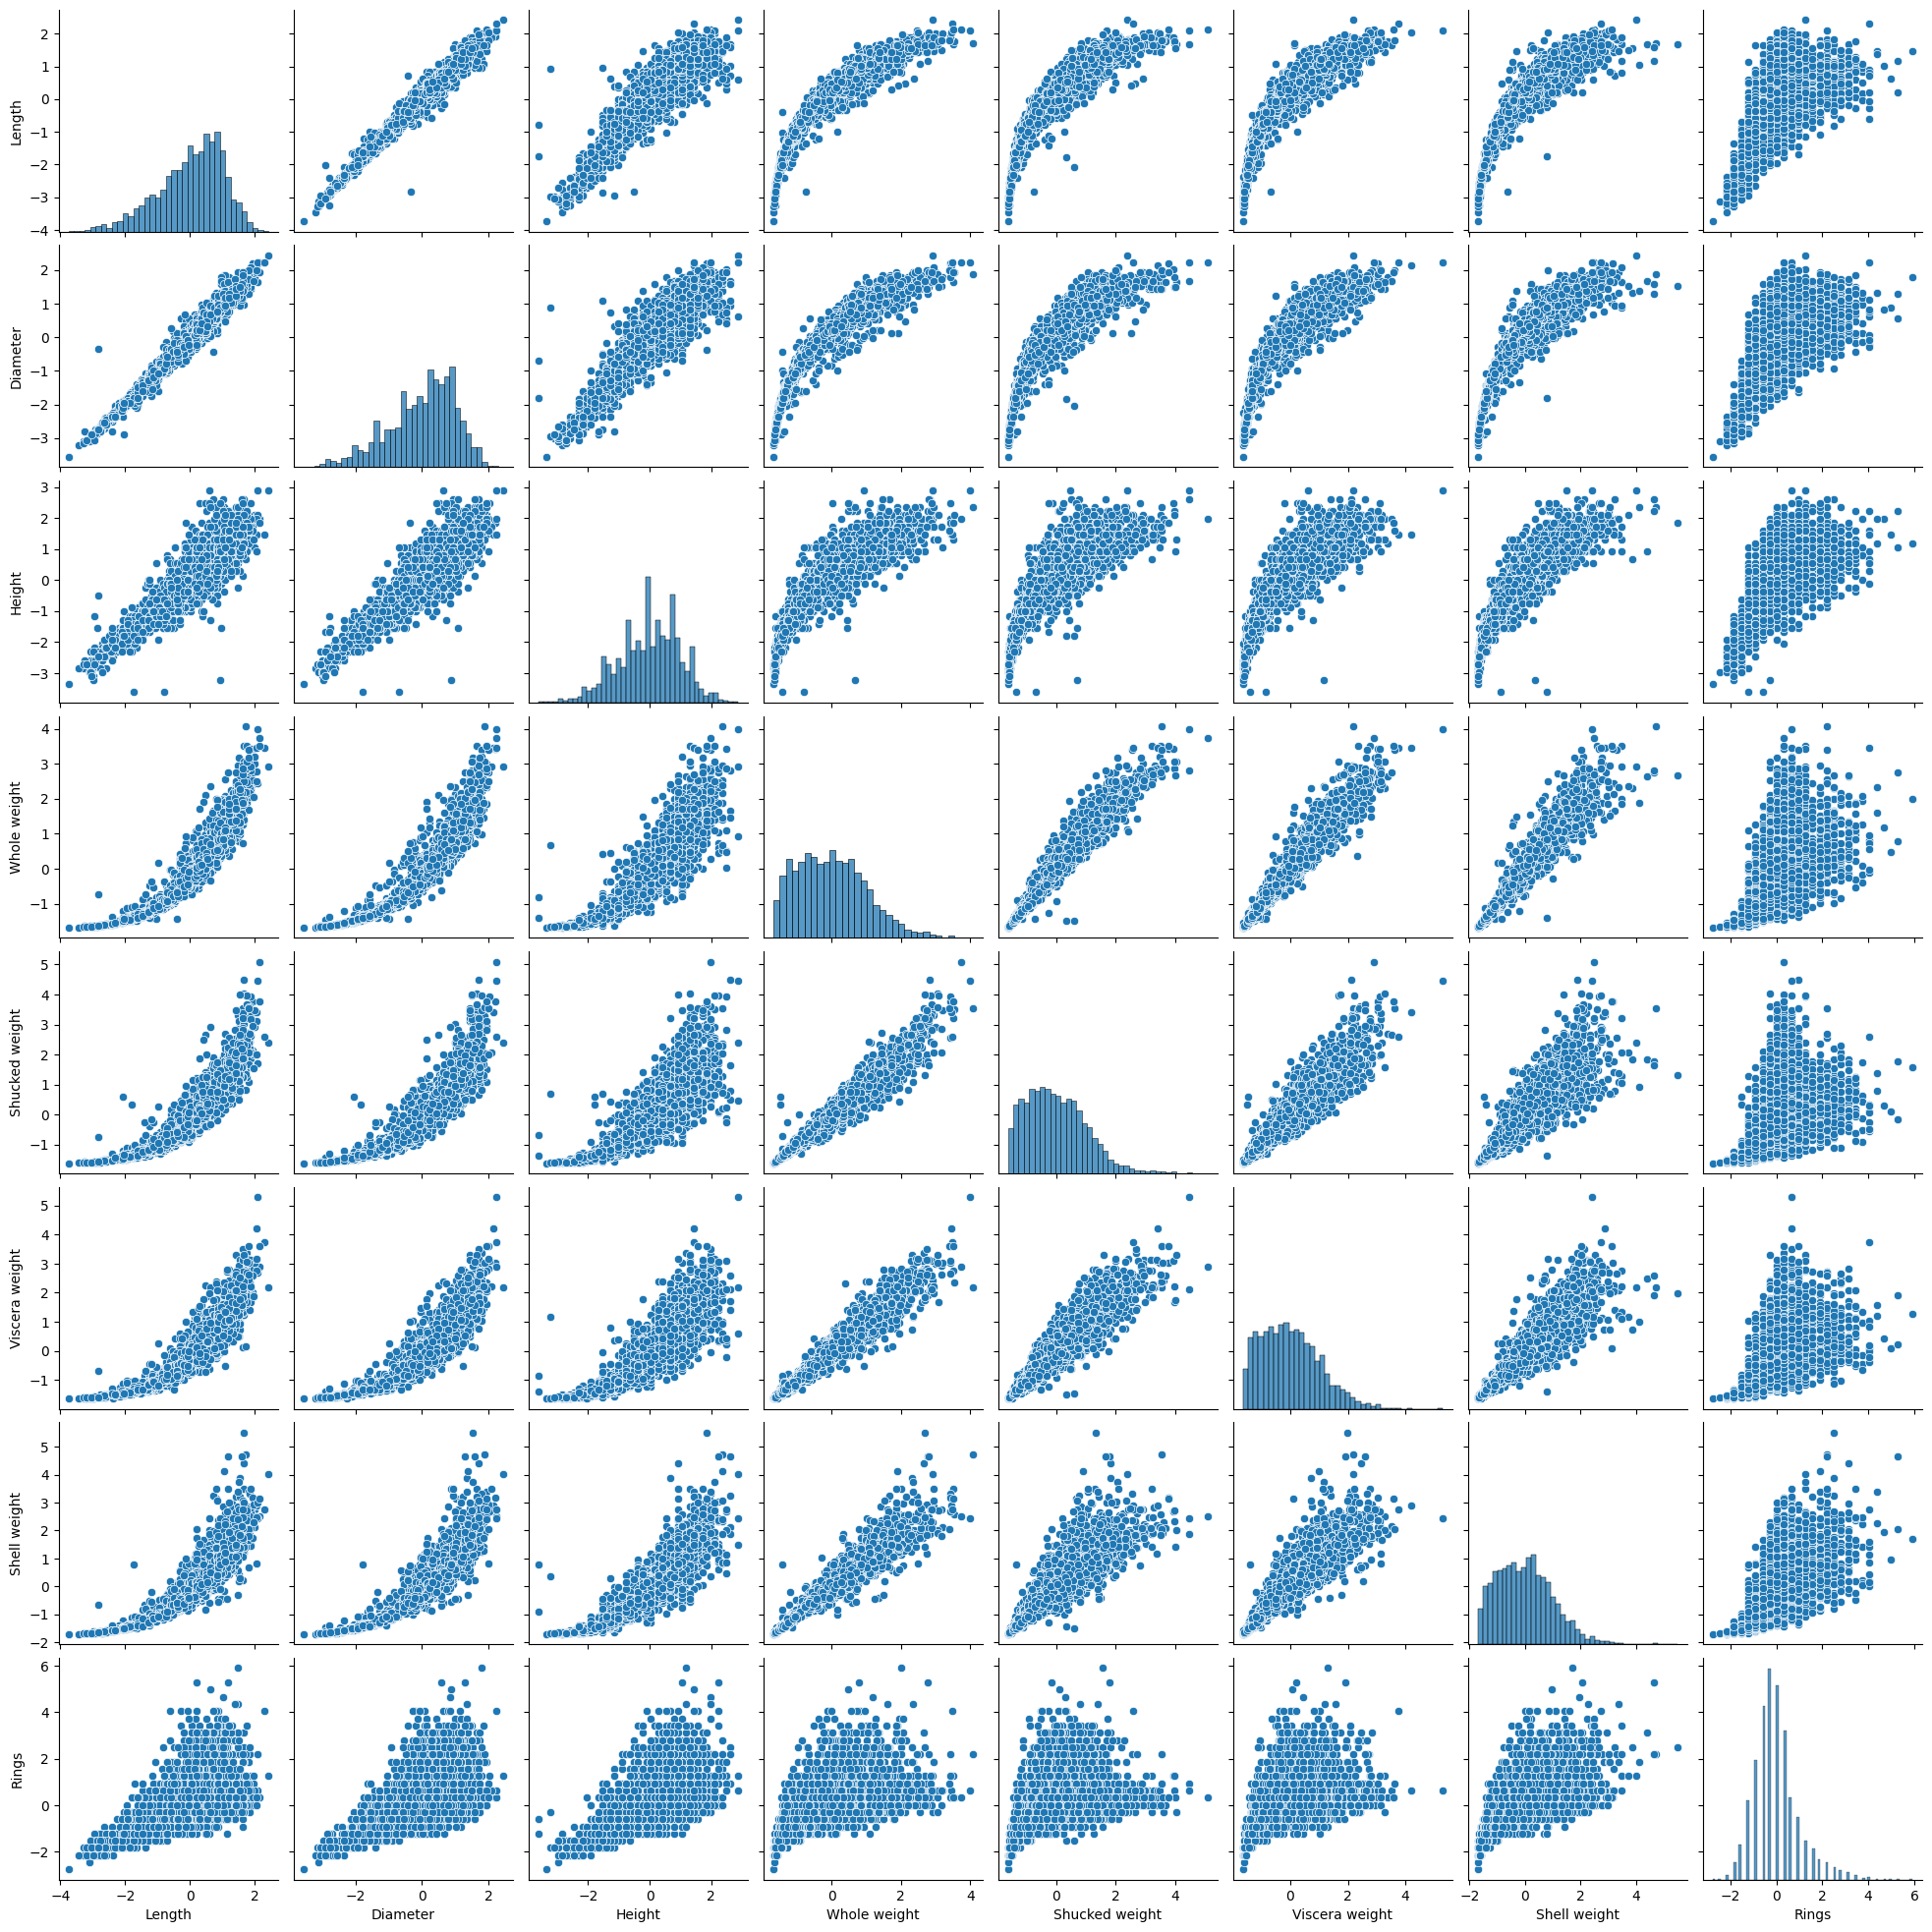

In [28]:
sns.pairplot(scaled_df)

Тепер накінець додаємо категореальні дані і маємо датасет готовий до роботи.

In [41]:
NrmDF = pd.concat([scaled_df, pr['Sex_I'], pr['Sex_M']], axis=1)
print(NrmDF.isnull().sum())
NrmDF

Length            0
Diameter          0
Height            2
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
Sex_I             2
Sex_M             2
dtype: int64


Length  Diameter    Height  Whole weight  Shucked weight   
0    -0.574558 -0.432149 -1.148233     -0.641898       -0.607685  \
1    -1.448986 -1.439929 -1.278155     -1.230277       -1.170910   
2     0.050033  0.122130 -0.108855     -0.309469       -0.463500   
3    -0.699476 -0.432149 -0.368699     -0.637819       -0.648238   
4    -1.615544 -1.540707 -1.537999     -1.272086       -1.215968   
...        ...       ...       ...           ...             ...   
4172  0.341509  0.424464  0.670679      0.118813        0.047908   
4173  0.549706  0.323686 -0.108855      0.279929        0.358808   
4174  0.632985  0.676409  1.710057      0.708212        0.748559   
4175  0.841182  0.777187  0.280912      0.541998        0.773341   
4176  1.549052  1.482634  1.450212      2.283681        2.640993   

      Viscera weight  Shell weight     Rings  Sex_I  Sex_M  
0          -0.726212     -0.638217  1.571544    0.0    1.0  
1          -1.205221     -1.212987 -0.910013    0.0    1.0  
2          -0.356690     -0.207139 -0.289624    0.0    0.0  
3          -0.607600     -0.602294  0.020571    0.0    1.0  
4          -1.287337     -1.320757 -0.910013    1.0    0.0  
...              ...           ...       ...    ...    ...  
4172        0.532900      0.073062  0.330765    0.0    0.0  
4173        0.309362      0.155685  0.020571    0.0    1.0  
4174        0.975413      0.496955 -0.289624    0.0    1.0  
4175        0.733627      0.410739  0.020571    0.0    0.0  
4176        1.787449      1.840481  0.640960    0.0    1.0  

[4177 rows x 10 columns]

In [44]:
NrmDF = NrmDF.dropna(axis=0)

In [45]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluateModel(model):
    predictions = model.predict(x_test)
    print("MSE: " + str(mean_squared_error(y_test, predictions)))
    print("R2:  " + str(r2_score(y_test, predictions)))
    
x_train = NrmDF.drop("Rings", axis=1)
y_train = NrmDF["Rings"]

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.1, random_state=1)
x_test.head()

Length  Diameter    Height  Whole weight  Shucked weight   
17   -0.699476 -0.684094 -1.018310     -0.770383       -0.772147  \
1131  0.341509  0.273297  0.280912      0.328876        0.991872   
299  -1.282428 -1.288762 -0.888388     -1.212942       -1.211462   
1338  0.466427  0.474853 -0.108855     -0.067795        0.205611   
2385 -0.616198 -0.633705 -0.628544     -0.678608       -0.760882   

      Viscera weight  Shell weight  Sex_I  Sex_M  
17         -0.853947     -0.781909    0.0    0.0  
1131        0.017394     -0.235878    0.0    1.0  
299        -1.113981     -1.177064    0.0    1.0  
1338       -0.124028     -0.250247    0.0    1.0  
2385       -0.580228     -0.710063    0.0    0.0

## Навчання

### Лінійна регресія

Проводжу підбір підходящого степеня для рівняння лінійної регресії і виводжу результат найкращої моделі. Виходячи з результатів набір данних є доволі складним для подібного розділення. Видимо лінійно він не розділим.

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

modelReg = linear_model.LinearRegression()
params = {'polynomial_features__degree': [1, 2, 4, 6]}

pipeline = Pipeline([
    ('polynomial_features', PolynomialFeatures()),
    ('linear_regression', modelReg)
])
searchRes = model_selection.GridSearchCV(pipeline, param_grid=params, cv=model_selection.KFold(5, shuffle=True), scoring='r2')
searchRes.fit(x_train, y_train)
modelRegBest = searchRes.best_estimator_

In [47]:
evaluateModel(modelRegBest)

MSE: 0.446056197727298
R2:  0.5364927020808203


### Рандом форест

Я вирішив не використовуючи звичайне дерево рішень щразу перейти до рандом форест. Він зазвичай дає значно кращі результати ніж звичайні дерева бо є бросто ансамблем цих дерев. Після підбору усіх ключових аргументів і виділення найкращої моделі я отримав результат трішки кращий за регересію.

In [48]:
modelRF = ensemble.RandomForestRegressor()
params = {
    'linear_regression__n_estimators': np.arange(50, 150, 50),
    'linear_regression__max_depth': np.arange(5, 15, 5),
    'linear_regression__min_samples_leaf': np.arange(1, 10, 3)
}
pipeline = Pipeline([
    ('polynomial_features', PolynomialFeatures()),
    ('linear_regression', modelRF)
])
searchRes = model_selection.GridSearchCV(pipeline, param_grid=params, cv=model_selection.KFold(5, shuffle=True), scoring='r2')
searchRes.fit(x_train, y_train)
modelRFBest = searchRes.best_estimator_

In [14]:
evaluateModel(modelRFBest)

MSE: 4.297670369242343
R2:  0.5608183733068783


### Метод К найближчих сусідів

З цим методом очікувано були отримані найгірші результати.

In [50]:
modelKNN = neighbors.KNeighborsRegressor()

params = {
    'linear_regression__n_neighbors': np.arange(1, 6, 1)
}
pipeline = Pipeline([
    ('polynomial_features', PolynomialFeatures()),
    ('linear_regression', modelKNN)
])
searchRes = model_selection.GridSearchCV(pipeline, param_grid=params, cv=model_selection.KFold(5, shuffle=True), scoring='r2')
searchRes.fit(x_train, y_train)
modelKNNBest = searchRes.best_estimator_

In [16]:
evaluateModel(modelKNNBest)

MSE: 4.9489952153110055
R2:  0.4942590793579309


## Висновок

В результаті рандом форест показав найкращі результати з усіх трьох використаних моделей, але навіть він працює доволі погано. Видимо для вирішення цієї задачі треба використовувати якісь більш продвинуті алгоритми. Наприклад повнозв'язні нейронні мережі.